<a href="https://colab.research.google.com/github/MRdvan/GoogleColabMachineLearning/blob/master/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df=pd.read_csv("/content/winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.shape

(1599, 12)

Daha sonra balance ,binning yapılacak sonuçlar kıyaslanacak (ilk önce dengesiz şekilde train edilecek)
datalarımız kalite feature ına göre çok imbalanced gözüküyor


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#plot pairplot
sns.pairplot(df)
#show graph
plt.show()

In [ ]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1071, 11) (528, 11) (1071,) (528,)


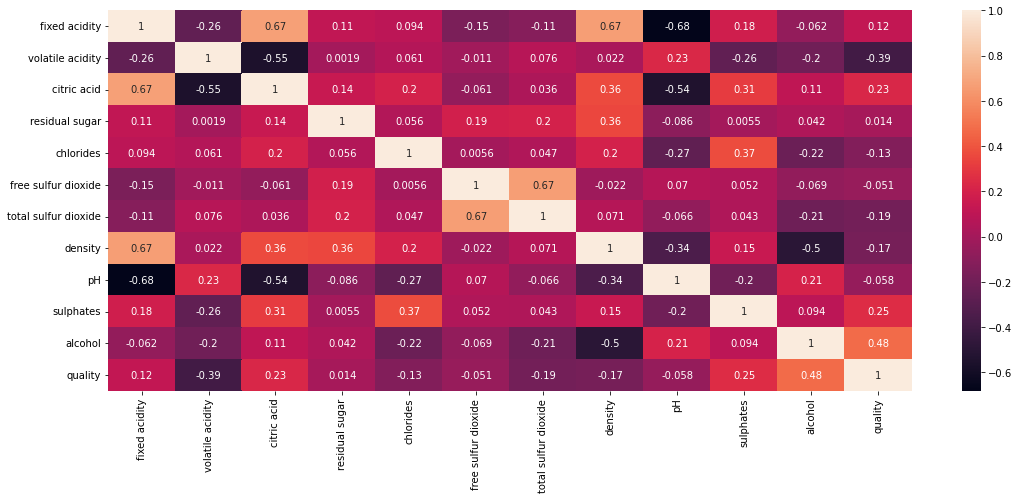

In [ ]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
clf=LogisticRegression(random_state=42)

In [ ]:
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"]}

In [ ]:
gs = GridSearchCV(clf, parameters,n_jobs=-1,scoring="accuracy",cv=5)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
gs.best_score_

0.6032079982612475

In [ ]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
y_test_predict = gs.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_predict)

0.5757575757575758

In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_test_predict)

array([[  0,   1,   1,   0,   0,   0],
       [  0,   0,  11,   8,   0,   0],
       [  0,   0, 167,  50,   0,   0],
       [  0,   0,  78, 123,  12,   0],
       [  0,   0,   5,  51,  14,   0],
       [  0,   0,   0,   2,   5,   0]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, gs.predict_proba(X_test), multi_class='ovr')

0.836195998887904

In [ ]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=12, ratio = 1.0)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
#from collections import Counter
#print(sorted(Counter(y_train_resampled).items()))

In [ ]:
#gs=gs.fit(X_train_resampled,y_train_resampled)

In [ ]:
#gs.best_score_

In [ ]:
#gs.best_params_

In [ ]:
#y_test_predict = gs.predict(X_test)

In [ ]:
#accuracy_score(y_test, y_test_predict)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters_for_SVC = {"C":[1,10], "kernel":["linear", "poly", "rbf"],"gamma":["scale", "auto"]}
svm=SVC(random_state=42)
gs2 = GridSearchCV(svm, parameters_for_SVC,n_jobs=-1,scoring="accuracy",cv=5)

In [ ]:
gs2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
gs2.best_score_

0.6265333623125408

In [ ]:
gs2.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
y_test_predict2 = gs2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_predict2)

0.615530303030303

In [ ]:
y_train_predict = gs2.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_predict)

0.8029878618113913